<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project(Hayatt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
from wordcloud import WordCloud 

In [2]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data_hayatt.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰..."
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...
...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러..."
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔..."
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트..."
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...


In [3]:
def regularExpression (text):
  exp = re.compile('[^ 가-힣]')
  return exp.sub('', text);

해당 test에 한글을 제외한 모든 것들이 걸러지는지 시험하기 위해 한국어를 제외한 대부분의 모든 것들을 넣어줍니다.

1. 숫자

2. ㅠㅠ ㅋㅋ와 같은 이모티콘

3. .,!와 같은 기호

4. 하트, 별과 같은 이모티콘

In [4]:
test='12월 15일에 테스트 해봅니당...ㅠㅠㅠㅠ 제발 성공하기를 흑ㅠㅠㅠㅠㅠㅠㅠㅠㅎㅎㅎㅎㅎㅎ, plz plz success...!!!!! 다 지워져라 얍★'
regularExpression(test)

'월 일에 테스트 해봅니당 제발 성공하기를 흑    다 지워져라 얍'

해당 환경설정은 사용자에 맞는 환경설정을 사용해야합니다.

그렇지 않으면 상상치도 못한 오류에 직면하게 될 수도 있습니다.

코드 작성자의 환경은 다음과 같습니다.

Python 3.8.8

java 17.0.1 2021-10-19 LTS

Java(TM) SE Runtime Environment (build 17.0.1+12-LTS-39)

Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)

JPype1-1.3.0-cp38-cp38-win_amd64.whl



In [5]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [6]:
from konlpy.tag import Okt
from collections import Counter

만약 에러가 발생한다면 해당 코드에 들어가서 에러가 나는 부분을 지워주면 정상 실행될 때도 있습니다.


이게 무슨소린가 싶겠지만 직접 해본사람은 이해할 수 있습니다.

In [7]:
test = regularExpression(df['review'][0])
test
okt = Okt()
testnouns = okt.nouns(test)
testnouns #정상 추출 확인!

['뷰', '추천', '숙소', '근처', '곳', '위치']

말뭉치를 생성

말뭉치: 자연어처리에서 자연어의 집합

In [8]:
totalCorpus = "".join(df['review'].tolist())
totalCorpus[:40]

'깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소'

In [9]:
totalCorpus = regularExpression(totalCorpus)
totalCorpus[:40]

'깔끔하고 청결하고 뷰도 좋습니다 편하게 쉬고자 한다면 추천합니다 숙소 근'

In [10]:
nouns = okt.nouns(totalCorpus)
print(nouns[:20])

['뷰', '추천', '숙소', '근처', '곳', '위치', '여자친구', '기념일', '겸', '파크', '하얏트', '방문', '직원', '친절', '방', '최상', '가격', '다른', '타', '호텔']


In [11]:
totalcount_notFiltered = Counter(nouns)
print(totalcount_notFiltered.most_common(20))

[('호텔', 842), ('뷰', 714), ('직원', 477), ('부산', 468), ('객실', 438), ('서비스', 426), ('하얏트', 392), ('파크', 318), ('광안대교', 302), ('시설', 296), ('조식', 292), ('이용', 259), ('수', 252), ('것', 250), ('방문', 247), ('수영장', 243), ('최고', 233), ('매우', 212), ('룸', 205), ('위치', 195)]


https://www.ranks.nl/stopwords/korean

불용어 사전 링크를 참고해서 엑셀로 정리하여 사용

In [45]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwordsHayatt.xlsx?raw=true').values.tolist()

In [13]:
filteredNouns = [x for x in nouns if [x] not in stopWords]
totalCount = Counter(filteredNouns)
print(totalCount.most_common(20))

[('뷰', 714), ('직원', 477), ('객실', 438), ('서비스', 426), ('광안대교', 302), ('시설', 296), ('조식', 292), ('이용', 259), ('수', 252), ('방문', 247), ('수영장', 243), ('최고', 233), ('매우', 212), ('룸', 205), ('위치', 195), ('곳', 191), ('여행', 189), ('정말', 184), ('해운대', 170), ('가격', 169)]


**뷰, 룸, 방 **을 제외하고는 한 글자가 의미가 없어보임. filter 다시 해봅시다 

이번에는 뷰, 룸, 방을 제외한 한 글자는 모두 사라지도록


In [14]:
filteredNouns = [x for x in filteredNouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
totalCount = Counter(filteredNouns)
print(filteredNouns[:20])
print(totalCount.most_common(20))

['뷰', '추천', '숙소', '근처', '위치', '여자친구', '기념일', '방문', '직원', '친절', '방', '최상', '가격', '편이', '고재', '방문', '의사', '이유', '만족', '추천']
[('뷰', 714), ('직원', 477), ('객실', 438), ('서비스', 426), ('광안대교', 302), ('시설', 296), ('조식', 292), ('이용', 259), ('방문', 247), ('수영장', 243), ('최고', 233), ('매우', 212), ('룸', 205), ('위치', 195), ('여행', 189), ('정말', 184), ('해운대', 170), ('가격', 169), ('전망', 150), ('생각', 145)]


이 과정을 함수로 표현합니다.

언젠가 쓸 일이 있을 겁니다.

In [15]:
def corpusToNouns (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  nouns_counter = Counter(nouns)
  return nouns_counter

그래프에 사용할 폰트를 업로드합니다.

폰트는 한글이 지원되는 폰트면 무엇이든 가능합니다.

대신 폰트의 이름은 'this'로 고정해주세요 (확장자가 포함된다면 this.ttf)


In [ ]:
from google.colab import files
files.upload()

여기까지 사실 필요한 데이터는 대부분 뽑은거죠.


이제 데이터를 이용해서 호텔의 리뷰를 분석해봅시다.


우선적으로 아래에 있는 코드 2줄은 한글 폰트를 적용하는 변수 이름입니다.



In [17]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_bar=fm.FontProperties(fname='/content/this.ttf', size=15)

1. 전체적인 내용에서 주요 단어 빈도수 분석

파싱된 명사의 개수는 중복을 포함해서 10317개로 단어에 대한 비율이 너무 작게 나타날 우려가 존재합니다.

그래서 상위 50위의 단어들을 파악해봅시다.


In [18]:
sum(totalCount.values())

21684

In [19]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

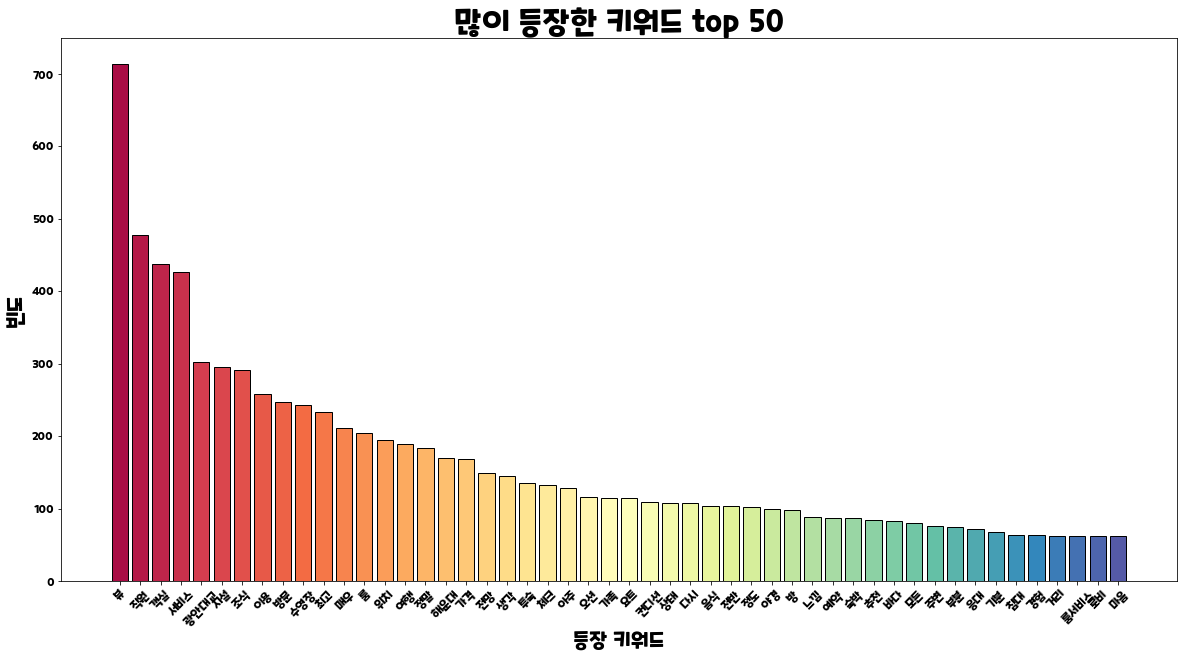

In [20]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

워드클라우드 분석은 일부로 전체 단어를 놓고 했습니다.

어차피 워드클라우드에서 너무 많다고 여겨지면 알아서 컷 해줍니다.

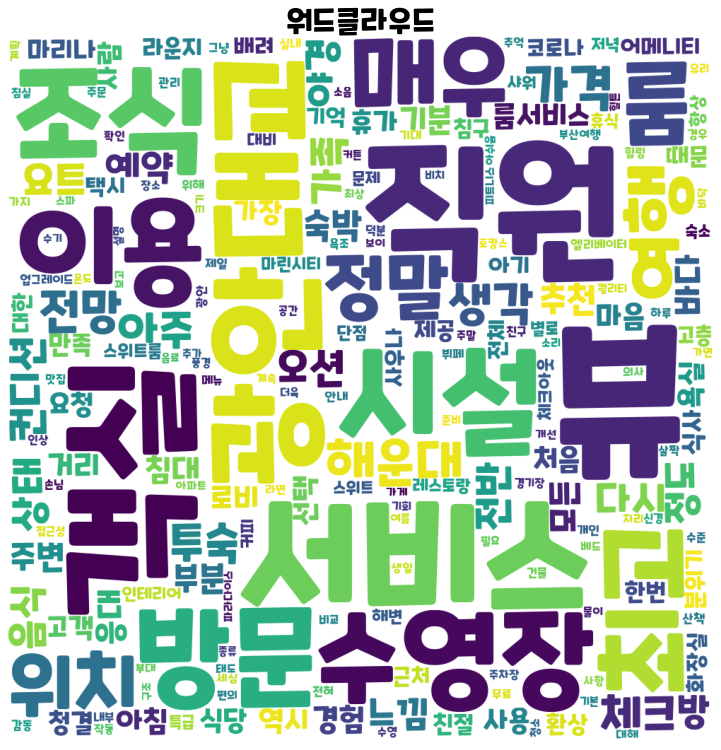

In [21]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

 점수별 분포와 점수에 따른 단어 빈도수 체크




In [22]:
rating = Counter(df['score'])
rating = sorted(rating.items())
rating

[(1, 38), (2, 31), (3, 55), (4, 271), (5, 905)]

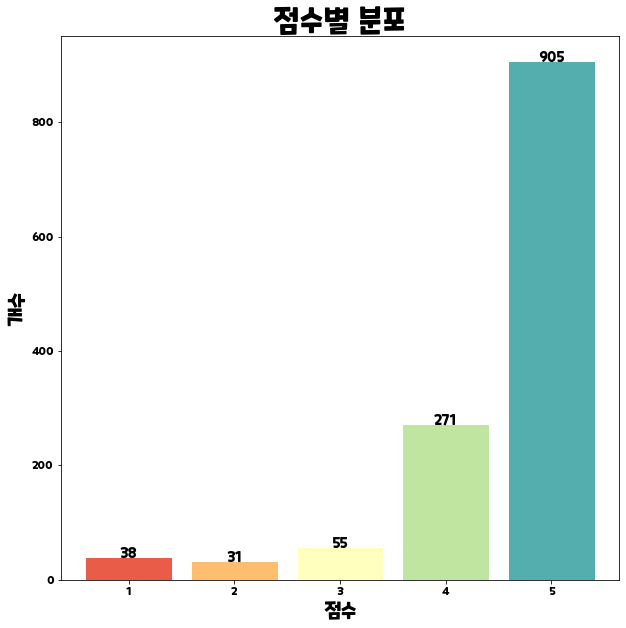

In [23]:
colors_rating = sns.color_palette('Spectral', 5)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
x = [x for (x, y) in rating]
y = [y for (x, y) in rating]
bars = plt.bar(x, y, color=colors_rating, edgecolor=colors_rating)

barText_rating = y
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width() * (1/2), b.get_height()+0.2, barText_rating[i], ha='center', fontsize=13, fontproperties=font_bar)

plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()

선호 리뷰와 비선호 리뷰를 분석해봅시다.

In [24]:
likes =  df[df['score']>3]
dislikes = df[df['score'] <= 3]
likesCorpus = "".join(likes['review'])
likesNouns = corpusToNouns("".join(likesCorpus))
dislikesCorpus = "".join(dislikes['review'])
dislikesNouns = corpusToNouns("".join(dislikesCorpus))

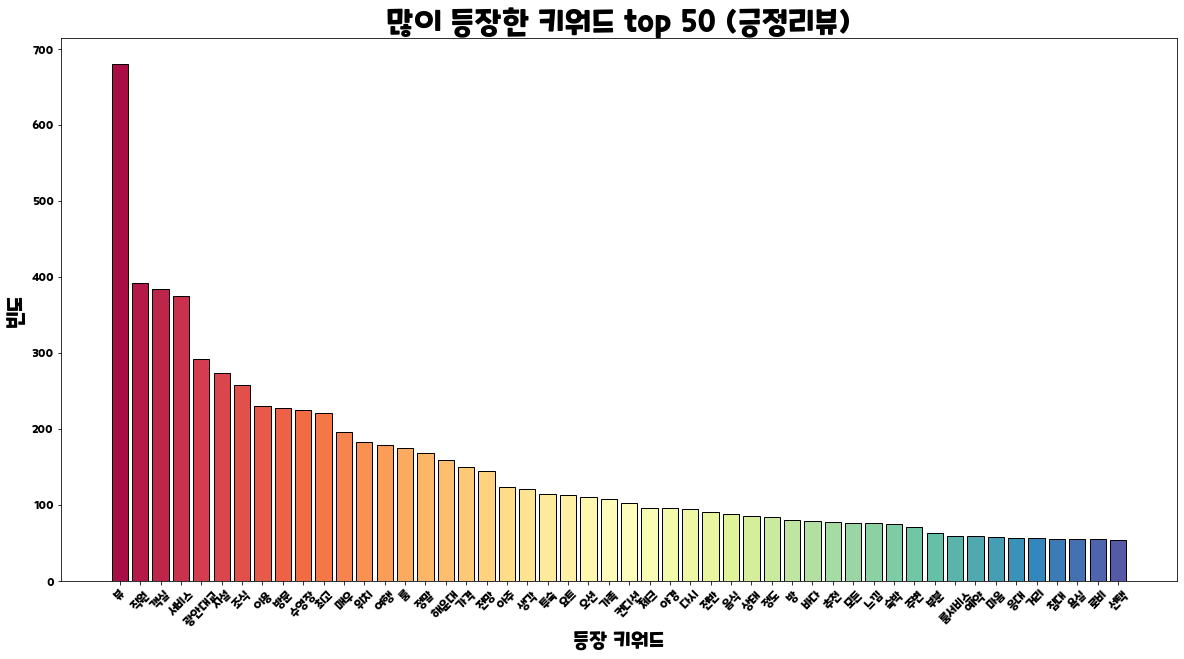

In [25]:
likes_top50 = likesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_top50]
y = [y for (x, y) in likes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

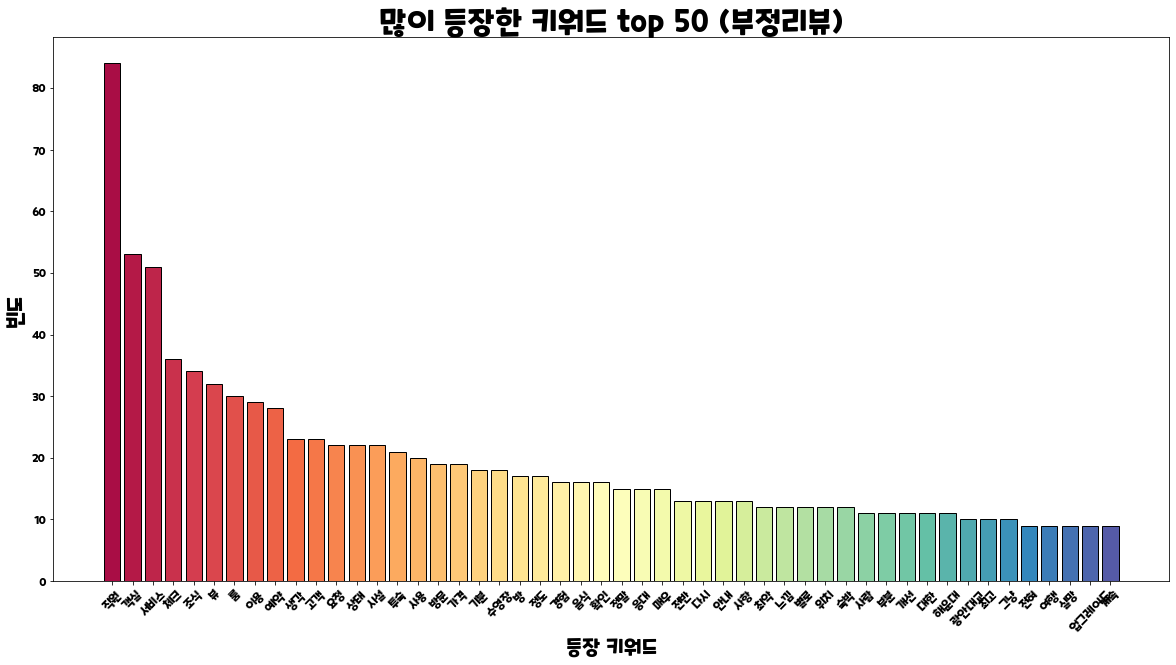

In [26]:
dislikes_top50 = dislikesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_top50]
y = [y for (x, y) in dislikes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

단순히 이거로만 본다면 직원과 객실, 서비스가 부정적인 것으로 보여진다.

하지만 해당 단어는 긍정적인 리뷰에서도 많이 볼 수 있기 때문에 직원, 객실이 부정적인 영향을 미치는지 알 수없다.


여기서 정상적인 감성 분석을 위해 TF-IDF 모델을 사용한다.

우선적으로 bag of Words 벡터를 생성


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x : corpusToNouns(x))
reviewList = df['review'].tolist()
bow_vect = vect.fit_transform(reviewList)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(word_list[:20])
print(count_list[:20])
bow_vect.shape

['가게', '가격', '가구', '가기', '가까이', '가끔', '가나', '가내', '가능', '가능성', '가닥', '가도', '가독성', '가드', '가득', '가든', '가량', '가로', '가림', '가면']
[ 19 157   2  17   6   8   1   1   6   3   1   6   1   3   4   1   1   3
   2  20]


(1300, 3235)

In [29]:
word_count_dict = dict(zip(word_list, count_list))

boW 벡터와 관련하여 TF-IDF 변환을 진행

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [31]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(1300, 3235)
  (0, 2663)	0.4534043692003677
  (0, 2029)	0.35358666073304185
  (0, 1508)	0.5631540146700895
  (0, 1226)	0.2270290044989896
  (0, 304)	0.5483760919467877


In [32]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

위에서 나누어준 likes 와 dislikes를 가지고 Training을 해봅시다.

In [33]:
import copy
df_test = copy.deepcopy(df)
def likeDislike(score):
  if score >= 4:
    return 1
  else:
    return 0
df_test['likeDislike'] = df_test['score'].apply(lambda x : likeDislike(x))
df_test

,score,review,likeDislike
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...,1
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...,1
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...,1
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰...",1
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...,0
...,...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러...",1
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔...",1
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트...",1
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [35]:
x = tf_idf_vect
y = df_test['likeDislike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
logi = LogisticRegression(random_state = 0)
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test)

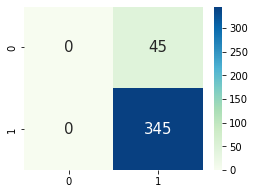

accurancy:  0.8846153846153846
precision:  0.8846153846153846
recall:  1.0
F1:  0.9387755102040816


In [36]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

In [37]:
df_test['likeDislike'].value_counts()

1    1176
0     124
Name: likeDislike, dtype: int64

In [38]:
positiveRandom = df_test[df_test['likeDislike'] == 1].sample(124, random_state=12).index.tolist()
negativeRandom = df_test[df_test['likeDislike'] == 0].sample(124, random_state=12).index.tolist()

In [39]:
random = positiveRandom + negativeRandom
x = tf_idf_vect[random]
y = df_test['likeDislike'][random]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
logi2 = LogisticRegression(random_state = 0)
logi2.fit (x_train, y_train)
y_predict = logi2.predict(x_test)

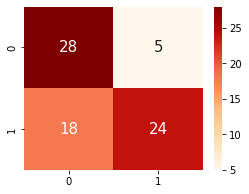

accurancy:  0.6933333333333334
precision:  0.8275862068965517
recall:  0.5714285714285714
F1:  0.676056338028169


In [40]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_predict)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15 }, cmap='OrRd', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_predict))
print('precision: ', precision_score(y_test, y_predict))
print('recall: ', recall_score(y_test, y_predict))
print('F1: ', f1_score(y_test, y_predict))

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Text major ticklabel objects>)

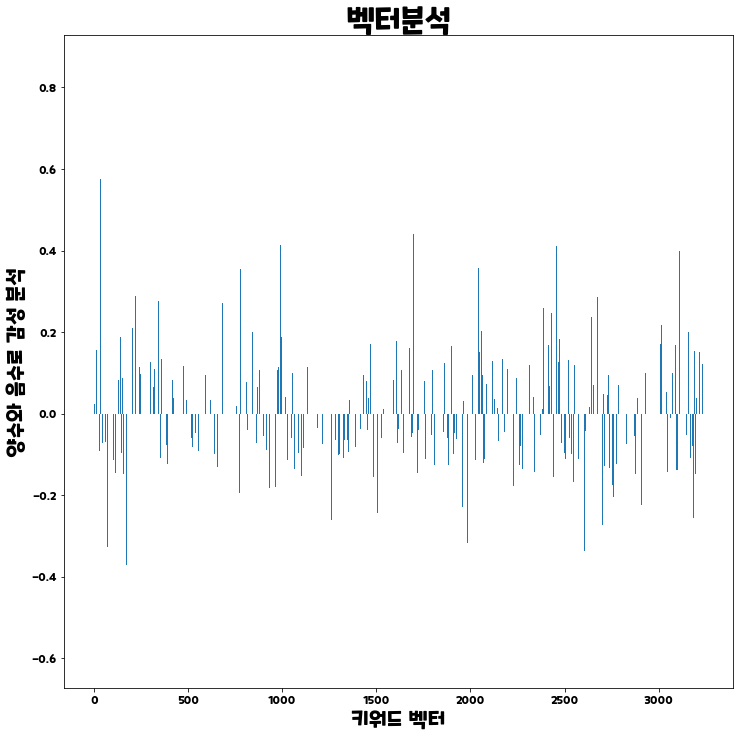

In [41]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize= (12, 12))
plt.bar(range(len(logi2.coef_[0])), logi2.coef_[0])
plt.xlabel("키워드 벡터",fontproperties=font_label)
plt.ylabel("양수와 음수로 감성 분석",fontproperties=font_label)
plt.title("벡터분석",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)

In [42]:
pos_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = True)
neg_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = False)

In [43]:
for x in pos_index[:30]:
  print(invert_index_vectorizer[x[1]], x[0])

뷰 0.8548623538541197
수영장 0.6550577249654517
광안대교 0.6166446160542861
친철 0.5753751908237397
가족 0.5750510819364177
매우 0.5026290701992853
야경 0.49797241066281134
부페 0.4862871142337671
위치 0.4847150610204932
여행 0.4810775218555859
오션 0.4649697716156059
아주 0.44020741598903435
방문 0.43164301735830574
인상 0.429417701492222
바다 0.41291795872056664
주변 0.4123115887001545
요트 0.39812219093628953
해운대 0.3979986198086407
전망 0.3939591229245415
마루 0.36492287247236727
어메니티 0.36323207279707254
마린시티 0.3630767448008579
메이크업 0.35868162066444287
유명 0.3583908583999136
마리나 0.35385291048272943
거실 0.35103128122245686
구조 0.3487345985339532
평소 0.3440706390324596
부부 0.3405604532462015
풍경 0.3331202865411812


In [44]:
for x in neg_index[:40]:
  print(invert_index_vectorizer[x[1]], x[0])

대비 -0.5997576986982024
최악 -0.5964564930906556
체크 -0.5889350823119904
기분 -0.5590538966851941
대한 -0.5377227385224427
고객 -0.5152214072476402
별로 -0.5148616917761782
전반 -0.5078550728218663
태도 -0.5048999021381401
기대 -0.45105860005390014
불만족 -0.42709748212424314
지불 -0.39277845452591914
이해 -0.37851641908230516
힐튼 -0.3778524726856357
가격 -0.3776729977659576
고장 -0.3708825707892699
전혀 -0.35701596576811945
종류 -0.33838091816045984
청소 -0.3361798030663531
파라다이스 -0.335377936039095
강력 -0.32668785853225213
입구 -0.3201134606859783
우왕좌왕 -0.3174211645022499
상태 -0.31563276051853273
사항 -0.30765459071617124
제대로 -0.307133604978521
말투 -0.30493278254648554
나머지 -0.30490223878683326
개선 -0.29567186014876734
대해 -0.28694095244428147
실망 -0.28686197980217243
경험 -0.28254962207018247
상황 -0.28173365585686333
동반 -0.27875050277251623
비치 -0.273867243698766
친절 -0.2728701933021052
예약 -0.2682351700976717
가요 -0.26636318504970236
비즈니스 -0.26613655302420075
특유 -0.26117792114592375
